In [1]:
import csv
import pandas as pd 


df_ini = pd.read_csv('all_reviews_Fr_clean.csv', delimiter =';')

def labeliser(note):
    #if note==3:
        #return 0
    #elif note==3.5:
        #return 0
    if note>3:
        return 1
    else :
        return -1



notes_labelisees = []
for i in range(0,len(df_ini)):
    notes_labelisees.append(labeliser(df_ini['Note'][i]))
    
   
data = {'restau_ID':df_ini['restau_ID'],
        'Titre':df_ini['Titre'],
        'NoteLabel':notes_labelisees,
        'Commentaire':df_ini['Commentaire'],
        'DateVisite':df_ini['DateVisite'],
        'Restaurant':df_ini['restaurant']}

df = pd.DataFrame(data,columns =[ 'Titre', 'NoteLabel', 'DateVisite' , 'Commentaire','Restaurant'] )

df.to_csv ('df_notes_labelisees.csv', index = False, header=True,encoding='utf-8-sig')



In [2]:
df_pos = df.loc[df['NoteLabel'] == 1]
df_neg = df.loc[df['NoteLabel'] == -1]

In [3]:
pip install stop-words


Note: you may need to restart the kernel to use updated packages.


In [9]:
from stop_words import get_stop_words
import matplotlib.pyplot as plt

In [10]:
stop_words = get_stop_words('fr')

In [11]:
from wordcloud import WordCloud, STOPWORDS

my_stopwords = set(STOPWORDS)

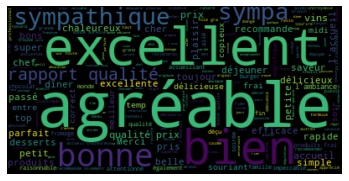

In [12]:
###POSITIF###
df_pos_list = df_pos['Commentaire'].tolist()
sep = ''
comments_pos_string = sep.join(df_pos_list)
newStopWords = ['serveur','plat','restaurant','cuisine','table','client','service','serveurs','serveur',"c'est",'verre','serveuse','service','commande','tables','bar','bars','plats','verre','vin','clients','personnel','euro','salade','entrée','dessert','repas','terrasse',"j'ai",'manger','endroit','quartier','carte','café','goût','viande','pain','prendre','lieu','boisson','brasserie','commandé','patron','côté','demande','Paris',"c'était",'menu','servi','salle','menu','jour','assiette','dit','toilettes','toilette','bref','vraiment','boire','ami','amis','cuisine','paris','nourriture','après',"qu'il",'surtout','dire','produit','choix','établissement','moment','payer','part','cadre','beaucoup',"qu'on","n'est",'plu','euros','pri','demandé','cocktail','frite','plutôt','sauce','maison','plus',"n'était",'frites','place',"n'a"]
stop_words.extend(newStopWords)
###AFFICHAGE WORDCLOUD###
cloud_comments_pos_string = WordCloud(stopwords = stop_words).generate(comments_pos_string)
plt.imshow(cloud_comments_pos_string, interpolation='bilinear')
plt.axis('off')
plt.show()


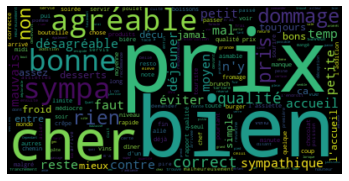

In [14]:
###NEGATIF###
df_neg_list = df_neg['Commentaire'].tolist()
sep = ''
comments_neg_string = sep.join(df_neg_list)
#ajout de bon et bonne dans la liste
newStopWords_neg = ['serveur','plat','restaurant','cuisine','table','client','service','serveurs','serveur',"c'est",'verre','serveuse','service','commande','tables','bar','bars','plats','verre','vin','clients','personnel','euro','salade','entrée','dessert','repas','terrasse',"j'ai",'manger','endroit','quartier','carte','café','goût','viande','pain','prendre','lieu','boisson','brasserie','commandé','bon','bonne','patron','côté','demande','Paris',"c'était",'menu','servi','salle','menu','jour','assiette','dit','toilettes','toilette','bref','vraiment','boire','ami','amis','cuisine','paris','nourriture','après',"qu'il",'surtout','dire','produit','choix','établissement','moment','payer','part','cadre','beaucoup',"qu'on","n'est",'plu','euros','pri','demandé','cocktail','frite','plutôt','sauce','maison','plus',"n'était",'frites','place',"n'a"]
stop_words.extend(newStopWords)
###AFFICHAGE WORDCLOUD###
cloud_comments_neg_string = WordCloud(stopwords = stop_words).generate(comments_neg_string)
plt.imshow(cloud_comments_neg_string, interpolation='bilinear')
plt.axis('off')
plt.show()